## <i >Student Performance<i /><br /><h4>-Shashwat Vaibhav<h4/>

In [23]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus
from IPython.display import Image

%matplotlib inline

In [2]:
#Loading the dataset of students' performance in  portuguese.
data = pd.read_csv('../data/student-por.csv',sep=';')
len(data)

649

In [3]:
display(data.head())
display(data.columns)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
#Adding a new column called 'pass', binary attribute.
#1 denoting Pass, 0 denoting Fail
data['pass'] = data.apply(lambda row: 1 if (row['G1']+ row['G2']+ row['G3'])>=35 else 0, axis=1)
data.drop(['G1','G2','G3'],axis=1,inplace=True)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [5]:
#nominal to categorical conversion using one-hot encoding
nominal = [ 'school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']
data = pd.get_dummies(data,columns=nominal)

In [50]:
# data.info() #all attributes are numerical

In [8]:
# Splitting data into training and testing sets, respectively
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('pass',axis=1)
y= data['pass']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101,
                                                    shuffle=True )

In [15]:
tree_model = DTC(criterion="entropy",max_depth=5)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

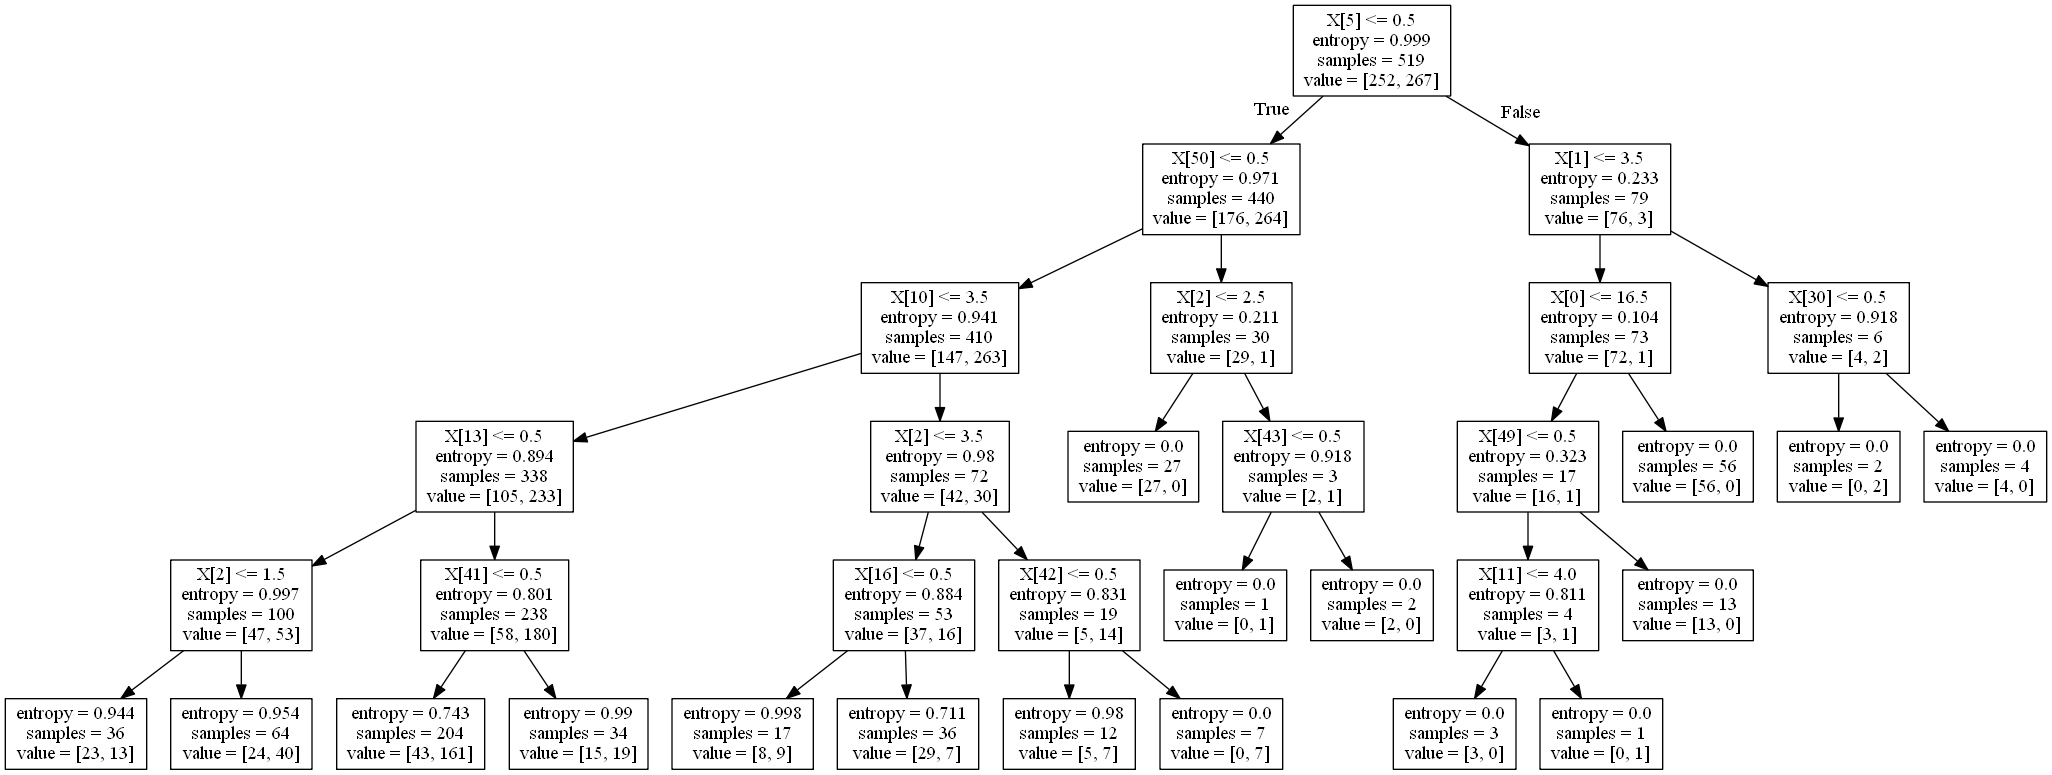

In [24]:
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
tree_model.score(X_test,y_test)#evaluating score

0.676923076923077

In [27]:
#cross validation of previous score
from sklearn.model_selection import cross_val_score as cvs
scores = cvs(tree_model,X,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2))

Accuracy: 0.67 (+/- 0.05)


In [28]:
# Accuracy of Decision Tree models with varying max-depth
for max_depth in range(1,20):
    t = DTC(criterion="entropy",max_depth=max_depth)
    scores = cvs(t,X,y,cv=5)
    print("Max-depth: %d, Accuracy: %0.2f (+/- %0.2f)"%(max_depth, scores.mean(),scores.std()))

Max-depth: 1, Accuracy: 0.62 (+/- 0.03)
Max-depth: 2, Accuracy: 0.69 (+/- 0.02)
Max-depth: 3, Accuracy: 0.70 (+/- 0.04)
Max-depth: 4, Accuracy: 0.69 (+/- 0.02)
Max-depth: 5, Accuracy: 0.67 (+/- 0.02)
Max-depth: 6, Accuracy: 0.68 (+/- 0.04)
Max-depth: 7, Accuracy: 0.66 (+/- 0.02)
Max-depth: 8, Accuracy: 0.66 (+/- 0.03)
Max-depth: 9, Accuracy: 0.65 (+/- 0.03)
Max-depth: 10, Accuracy: 0.64 (+/- 0.04)
Max-depth: 11, Accuracy: 0.64 (+/- 0.04)
Max-depth: 12, Accuracy: 0.63 (+/- 0.04)
Max-depth: 13, Accuracy: 0.64 (+/- 0.02)
Max-depth: 14, Accuracy: 0.63 (+/- 0.02)
Max-depth: 15, Accuracy: 0.64 (+/- 0.03)
Max-depth: 16, Accuracy: 0.63 (+/- 0.03)
Max-depth: 17, Accuracy: 0.62 (+/- 0.03)
Max-depth: 18, Accuracy: 0.63 (+/- 0.04)
Max-depth: 19, Accuracy: 0.63 (+/- 0.03)
